**Importing dependencies :**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

**Loading dataset :**

In [9]:
dataset = pd.read_csv("../datasets/housing/housing.csv")
list(dataset)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

**Adding Income category :**

<Axes: >

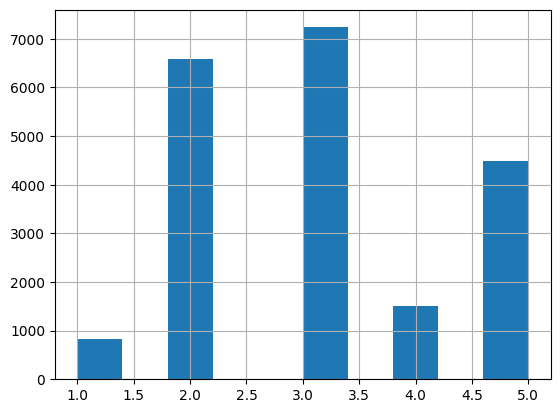

In [11]:
dataset["income_cat"] = pd.cut(dataset["median_income"],bins=[0.,1.5,3.0,4.5,5.,np.inf],labels=[1,2,3,4,5]) 
dataset["income_cat"].hist()

**Stratified Sampling :**

In [12]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [14]:
for train_index, test_index in split.split(dataset,dataset["income_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
5    0.217539
4    0.073159
1    0.039971
Name: count, dtype: float64

**Removing newly created category class :**

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

**Visualising the data :**

In [19]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

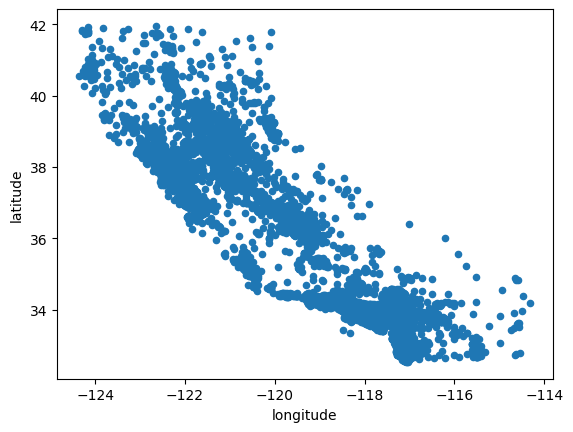

In [20]:
housing.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

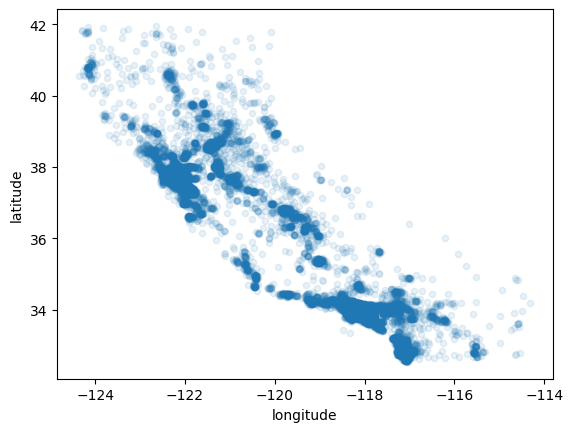

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)